In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from random import randrange
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC

df = pd.read_excel("dataSet.xlsx")

In [ ]:
print(df.head())

   Id  HoraPico  Festivo  Lluvia  Peatones  Vehiculos  Aumento
0   1         0        0       1         0          1        1
1   2         1        0       1         1          1        1
2   3         1        0       0         0          1        1
3   4         0        1       0         2          1        0
4   5         0        0       0         0          1        1


In [ ]:
train_set = df.drop(["Id", "Aumento"], axis=1)
print(train_set.head())

class_set = df["Aumento"]

   HoraPico  Festivo  Lluvia  Peatones  Vehiculos
0         0        0       1         0          1
1         1        0       1         1          1
2         1        0       0         0          1
3         0        1       0         2          1
4         0        0       0         0          1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_set, class_set, test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

y_test_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_test_pred)
print(f"Precisión: {accuracy}")

Precisión: 1.0


In [ ]:
dataSetCopy = train_set.copy()

percentage = 20

nRows, nColumns = dataSetCopy.shape

total_celdas = nRows * (nColumns - 1)
numero_nans = (total_celdas * percentage) // 100

for i in range(numero_nans):
    row = randrange(0, nRows)
    column = randrange(0, nColumns)
    dataSetCopy.iloc[row, column] = np.nan

In [ ]:
missingValuesAttribute = dataSetCopy.isna().sum()
print(missingValuesAttribute)

HoraPico     13
Festivo      17
Lluvia       12
Peatones     16
Vehiculos    17
dtype: int64


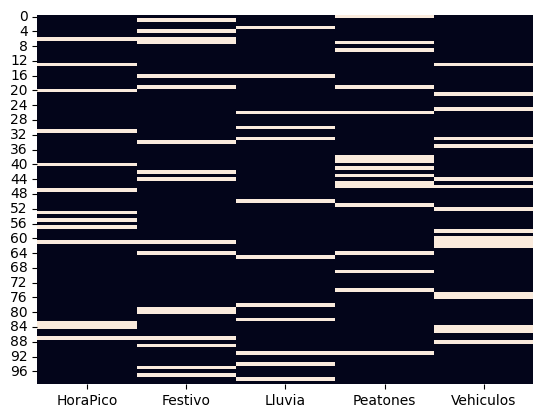

In [ ]:
sns.heatmap(dataSetCopy.isnull(), cbar=False)
plt.show()

In [ ]:
knn_imputer = KNNImputer(n_neighbors = 10)

train_imputed = knn_imputer.fit_transform(dataSetCopy)

train_imputed = pd.DataFrame(train_imputed, columns = train_set.columns)

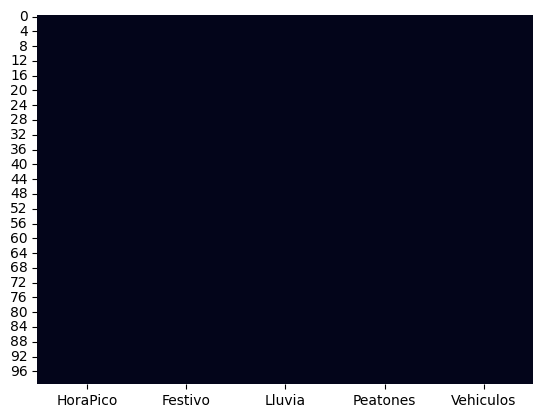

In [ ]:
sns.heatmap(train_imputed.isnull(), cbar=False)
plt.show()

In [ ]:
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(train_imputed, class_set, test_size=0.2, random_state=42)

dt_classifier2 = DecisionTreeClassifier()
dt_classifier2.fit(X_train_imp, y_train_imp)

y_test_pred2 = dt_classifier.predict(X_test_imp)

accuracy_dt = accuracy_score(y_test_imp, y_test_pred2)
print(f"Precisión: {accuracy}")

Precisión: 1.0


In [ ]:
rf_classifier = RandomForestClassifier()
rf_classifier .fit(X_train_imp, y_train_imp)

y_test_RF = rf_classifier.predict(X_test_imp)

accuracy_rf = accuracy_score(y_test_imp, y_test_RF)
print(f"Precisión: {accuracy}")

Precisión: 1.0


In [ ]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

y_test_SVC = svm_model.predict(X_test_imp)

accuracy_svc = accuracy_score(y_test_imp, y_test_SVC)
print(f"Precisión: {accuracy}")




Precisión: 1.0
